In [21]:
# We chose the stock market case for Tesla case and decided to solve the case using classification algorithm.
# Classification algorithm such as KNN was chosen because...

In [22]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

In [ ]:
# Loading the dataset
tesla_df = pd.read_csv('./data/TSLA.csv')
tesla_df.head()
#tesla_df.info()

In [24]:
# Preprocess the data
# Parsing the date column to datetime format
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Sorting date into chronological order
tesla_df.sort_values(by='Date', inplace=True)

In [25]:
# Extract date-related features: year, month, day, and day of the week
tesla_df['Year'] = tesla_df['Date'].dt.year
tesla_df['Month'] = tesla_df['Date'].dt.month
tesla_df['Day'] = tesla_df['Date'].dt.day

In [26]:
# Define the target variable (Close price) and drop unnecessary columns
X = tesla_df[['Year', 'Month', 'Day']]  # Features (date-related)
y = tesla_df['Close']  # Target (stock price)

In [27]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# create a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [29]:
# Make predictions
y_predict = lin_reg.predict(X_test)

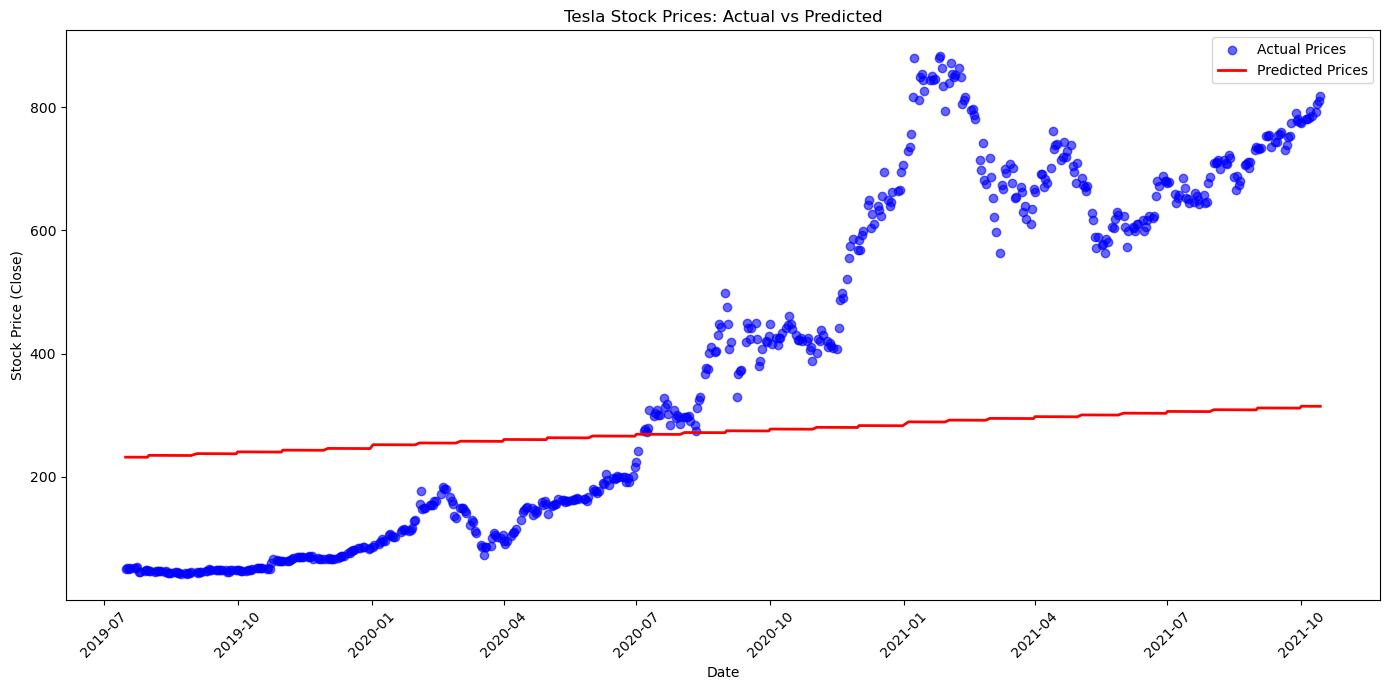

In [30]:
# Plotting the actual and predicted values
plt.figure(figsize=(14, 7))  # Set the figure size

# Scatter plot for actual values
plt.scatter(tesla_df['Date'].iloc[len(X_train):], y_test, color='blue', label='Actual Prices', alpha=0.6)

# Line plot for predicted values
plt.plot(tesla_df['Date'].iloc[len(X_train):], y_predict, color='red', label='Predicted Prices', linewidth=2)

# Adding labels and title
plt.title('Tesla Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.legend()  # Add legend
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

In [ ]:
# print the model parameters
print("intercept: ", lin_reg.intercept_)
print("coefficients: ", lin_reg.coef_)
print("score: ", lin_reg.score(X, y))